In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/playground-series-s4e2/sample_submission.csv
/kaggle/input/playground-series-s4e2/train.csv
/kaggle/input/playground-series-s4e2/test.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import cross_val_score,train_test_split
from sklearn.preprocessing import StandardScaler,OrdinalEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import *
np.random.seed(0)

In [3]:
train_data = pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')
train_data.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [4]:
print(f'Shape of train_data dataset is {train_data.shape}')

Shape of train_data dataset is (20758, 18)


In [5]:
test = pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')
test.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.000000,Sometimes,no,2.825629,no,0.855400,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.000000,Sometimes,no,3.000000,no,1.000000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.000000,Sometimes,no,2.621877,no,0.000000,0.250502,Sometimes,Public_Transportation
3,20761,Male,20.979254,1.553127,103.669116,yes,yes,2.000000,2.977909,Sometimes,no,2.786417,no,0.094851,0.000000,Sometimes,Public_Transportation
4,20762,Female,26.000000,1.627396,104.835346,yes,yes,3.000000,3.000000,Sometimes,no,2.653531,no,0.000000,0.741069,Sometimes,Public_Transportation


In [6]:
print(train_data.isnull().sum())

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [7]:
train_data.drop('id',axis=1,inplace=True)

In [8]:
train_data.duplicated().sum()

0

In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          20758 non-null  object 
 1   Age                             20758 non-null  float64
 2   Height                          20758 non-null  float64
 3   Weight                          20758 non-null  float64
 4   family_history_with_overweight  20758 non-null  object 
 5   FAVC                            20758 non-null  object 
 6   FCVC                            20758 non-null  float64
 7   NCP                             20758 non-null  float64
 8   CAEC                            20758 non-null  object 
 9   SMOKE                           20758 non-null  object 
 10  CH2O                            20758 non-null  float64
 11  SCC                             20758 non-null  object 
 12  FAF                             

**Target Column**

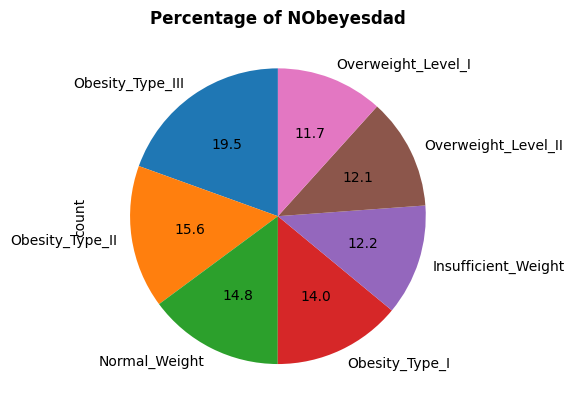

In [10]:
train_data['NObeyesdad'].value_counts().plot(kind='pie',startangle=90,autopct='%0.1f')
plt.title('Percentage of NObeyesdad',fontweight='bold')
plt.show()

**Categorical Columns**

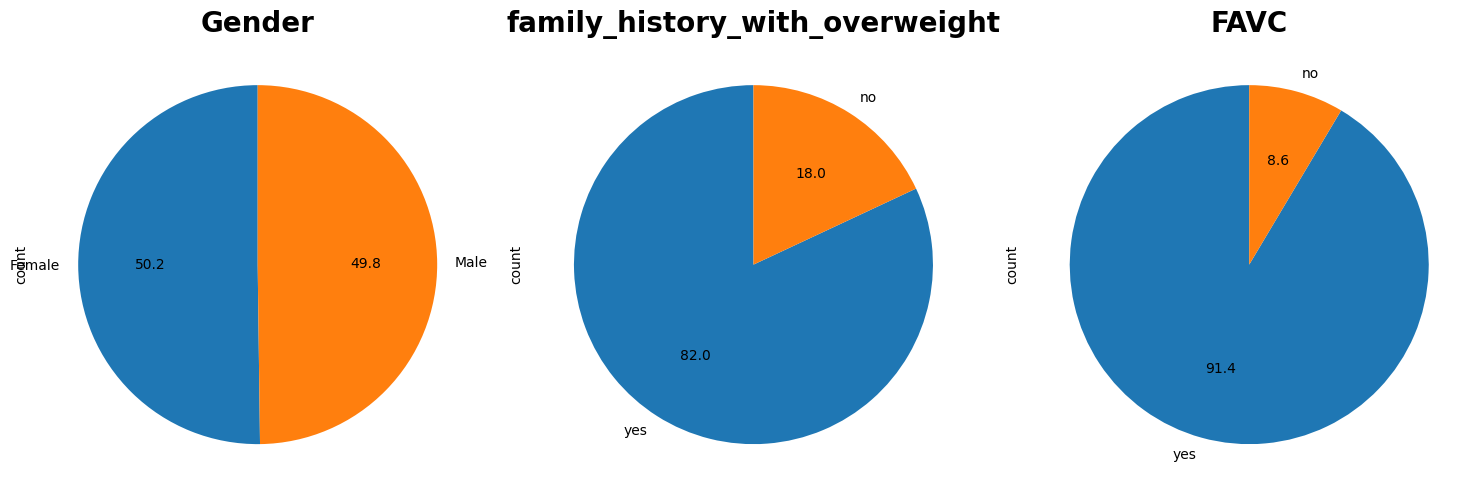

In [11]:
obj_cols = ['Gender', 'family_history_with_overweight','FAVC']
x=1
plt.subplots(1,3,figsize=(15,10))
for col in obj_cols:
  plt.subplot(1,3,x)
  train_data[col].value_counts().plot(kind='pie',startangle=90,autopct='%0.1f')
  plt.title(col,fontweight='bold',fontsize=20)
  x += 1

plt.tight_layout()

plt.show()

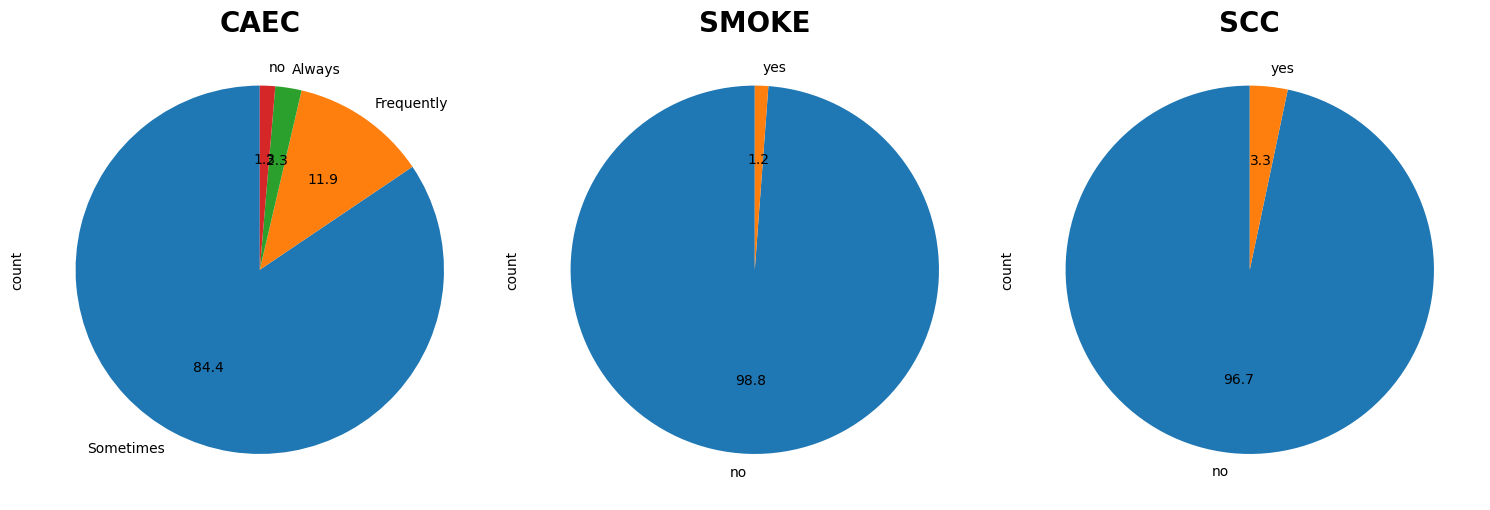

In [12]:
obj_cols = ['CAEC', 'SMOKE','SCC',]
x=1
plt.subplots(1,3,figsize=(15,10))
for col in obj_cols:
  plt.subplot(1,3,x)
  train_data[col].value_counts().plot(kind='pie',startangle=90,autopct='%0.1f')
  plt.title(col,fontweight='bold',fontsize=20)
  x += 1

plt.tight_layout()

plt.show()

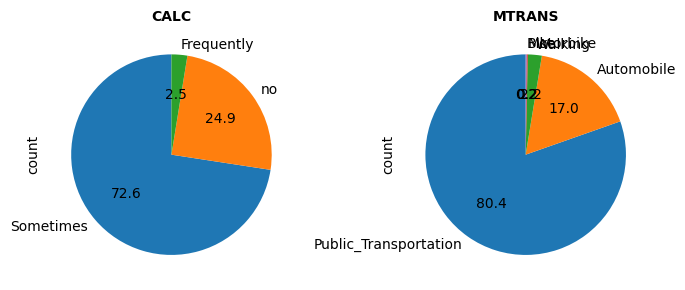

In [13]:
obj_cols = ['CALC', 'MTRANS']
x=1
plt.subplots(1,2,figsize=(7,3))
for col in obj_cols:
  plt.subplot(1,2,x)
  train_data[col].value_counts().plot(kind='pie',startangle=90,autopct='%0.1f')
  plt.title(col,fontweight='bold',fontsize=10)
  x += 1

plt.tight_layout()

plt.show()

**Obesity in Males and Females**

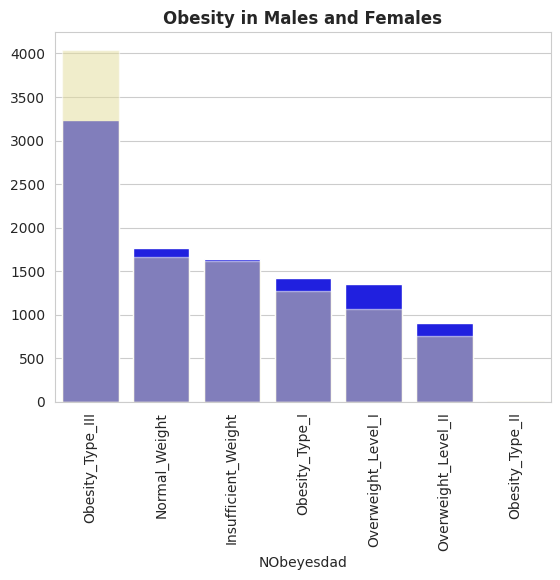

In [14]:
sns.set_style('whitegrid')
males = train_data[train_data['Gender'] == 'Male']['NObeyesdad'].value_counts()
sns.barplot(x=males.index,y=males.values,color='Blue')
plt.title('Obesity in Males and Females',fontweight='bold')
plt.xticks(rotation=90)


females = train_data[train_data['Gender'] == 'Female']['NObeyesdad'].value_counts()
sns.barplot(x=females.index,y=females.values,alpha=0.5,color='Khaki')
plt.xticks(rotation=90)
plt.show()

**family_history_with_overweight,FAVC,SMOKE,SCC**

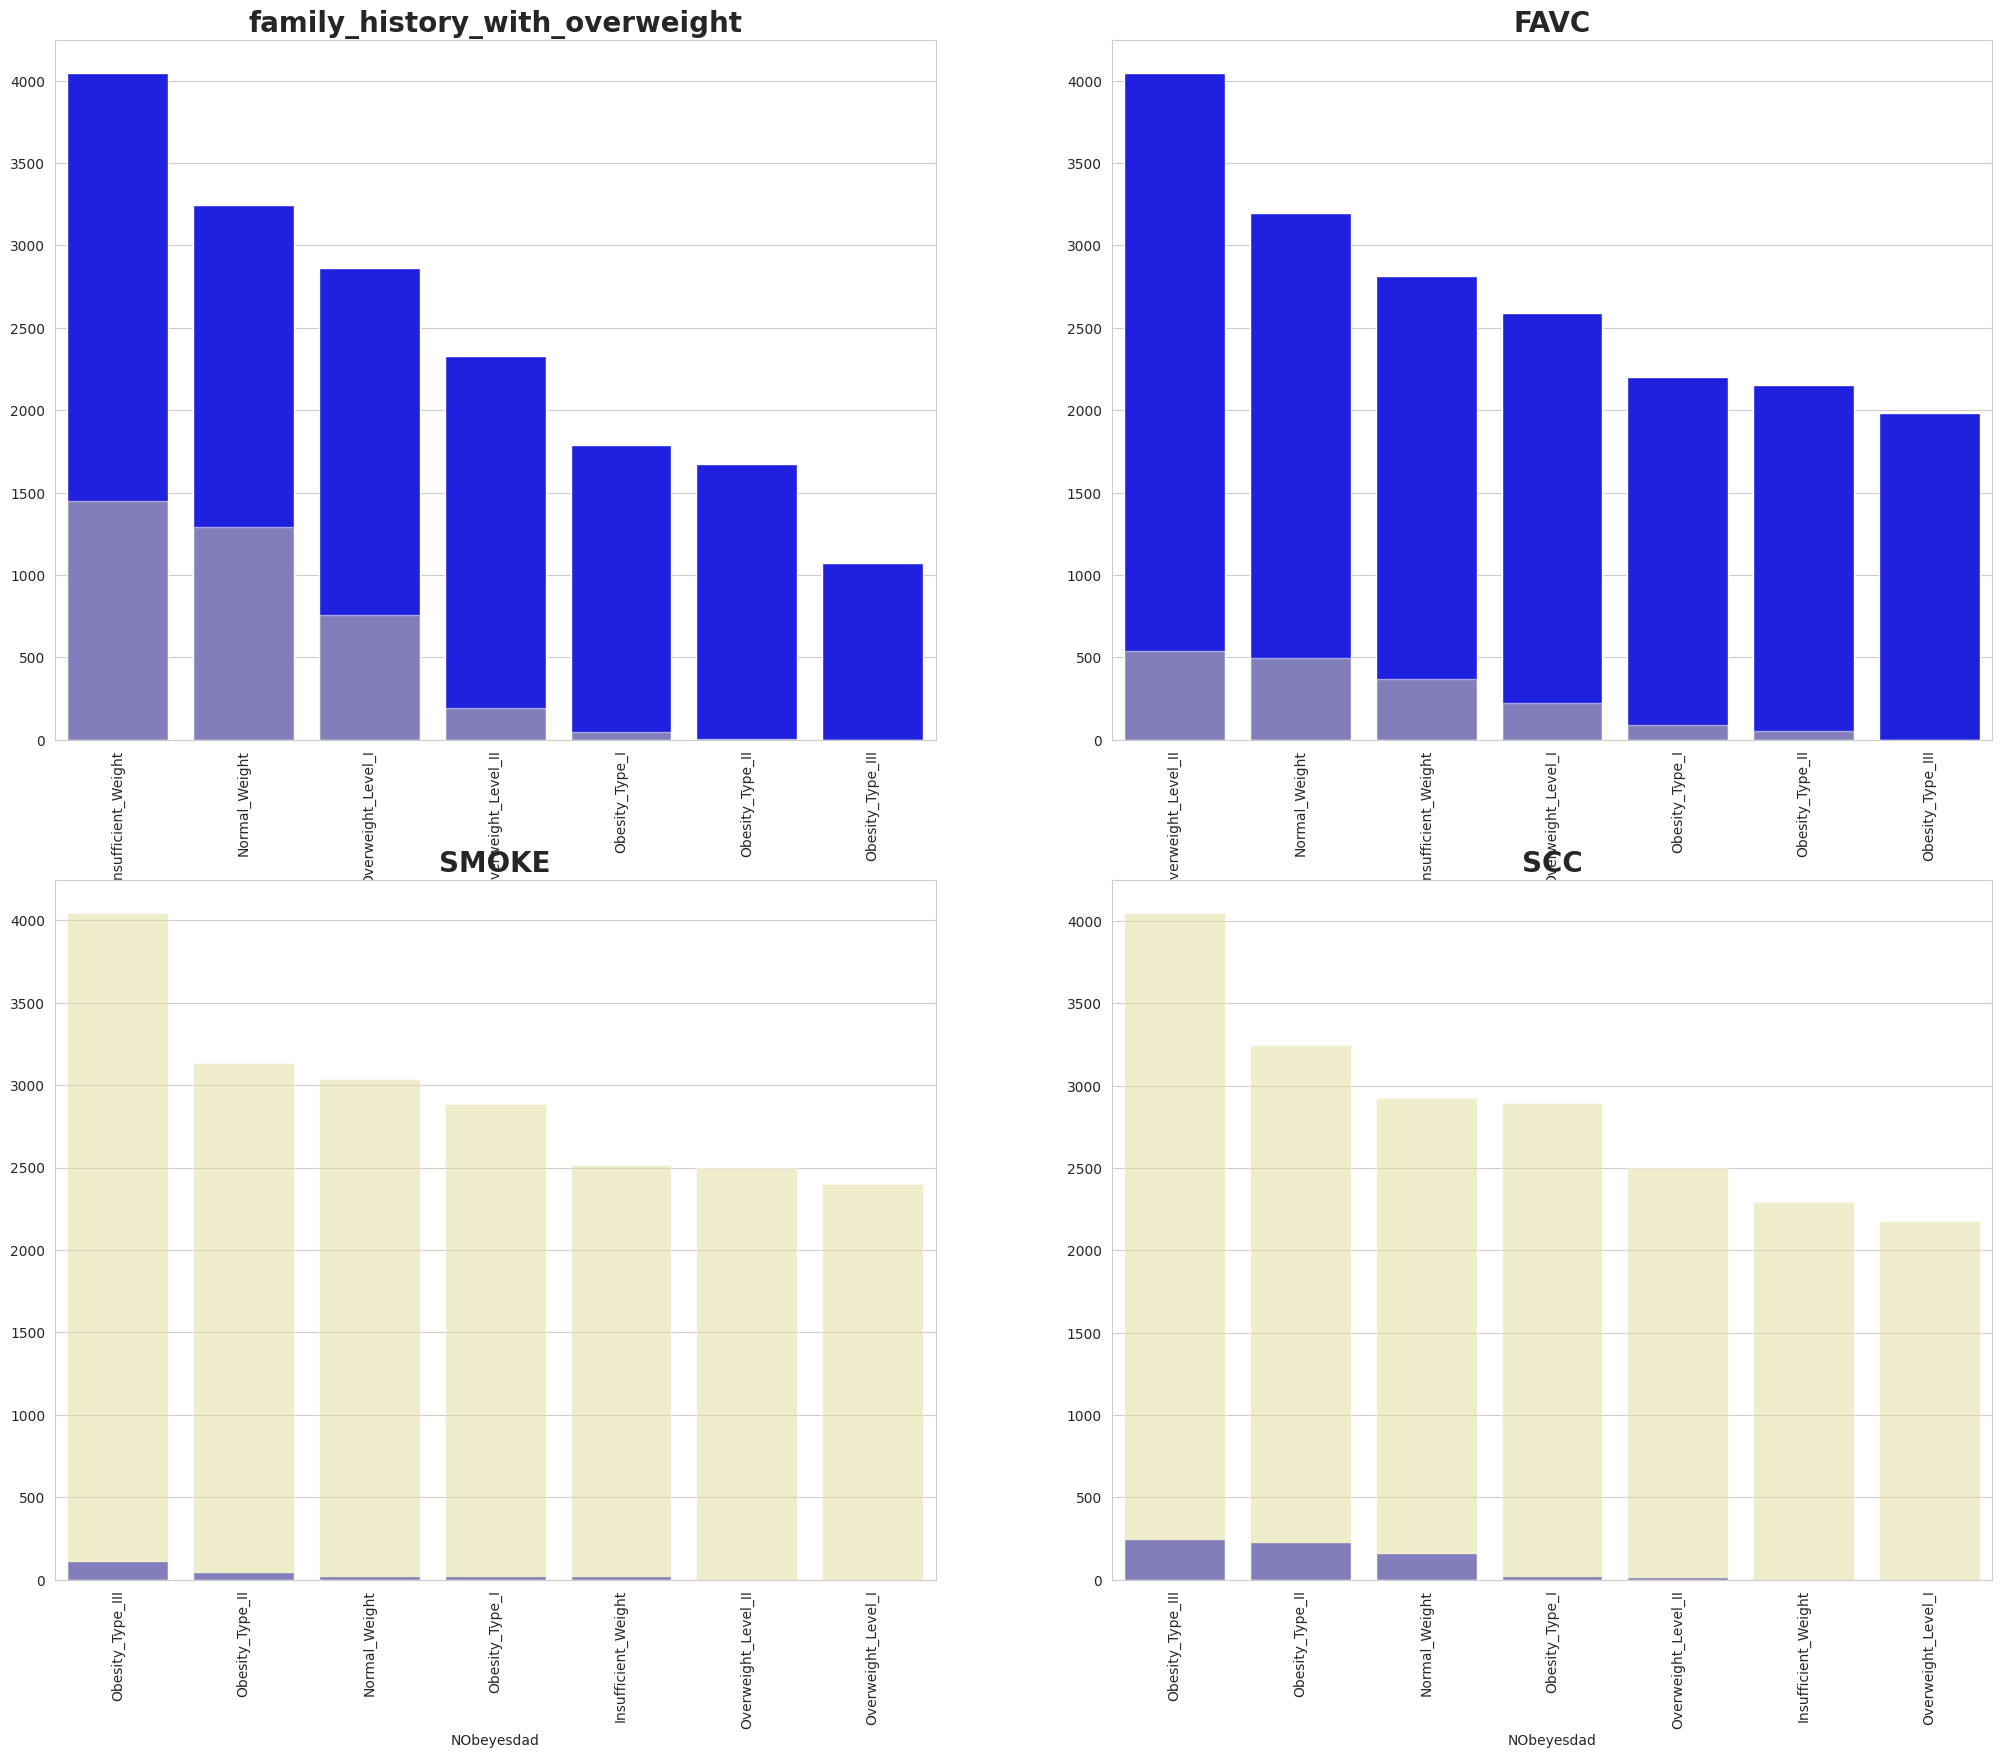

In [15]:
Yes_no = ['family_history_with_overweight', 'FAVC','SMOKE','SCC']
x=1
plt.subplots(2,2,figsize=(25,20))
for col in Yes_no:
  plt.subplot(2,2,x)
  yes = train_data[train_data[col] == 'yes']['NObeyesdad'].value_counts()
  sns.barplot(x=yes.index,y=yes.values,color='Blue')
  plt.title(col,fontweight='bold',fontsize=20)
  plt.xticks(rotation=90)


  no = train_data[train_data[col] == 'no']['NObeyesdad'].value_counts()
  sns.barplot(x=no.index,y=no.values,alpha=0.5,color='Khaki')
  plt.xticks(rotation=90)

  x += 1
plt.show()

**CAEC , CALC**

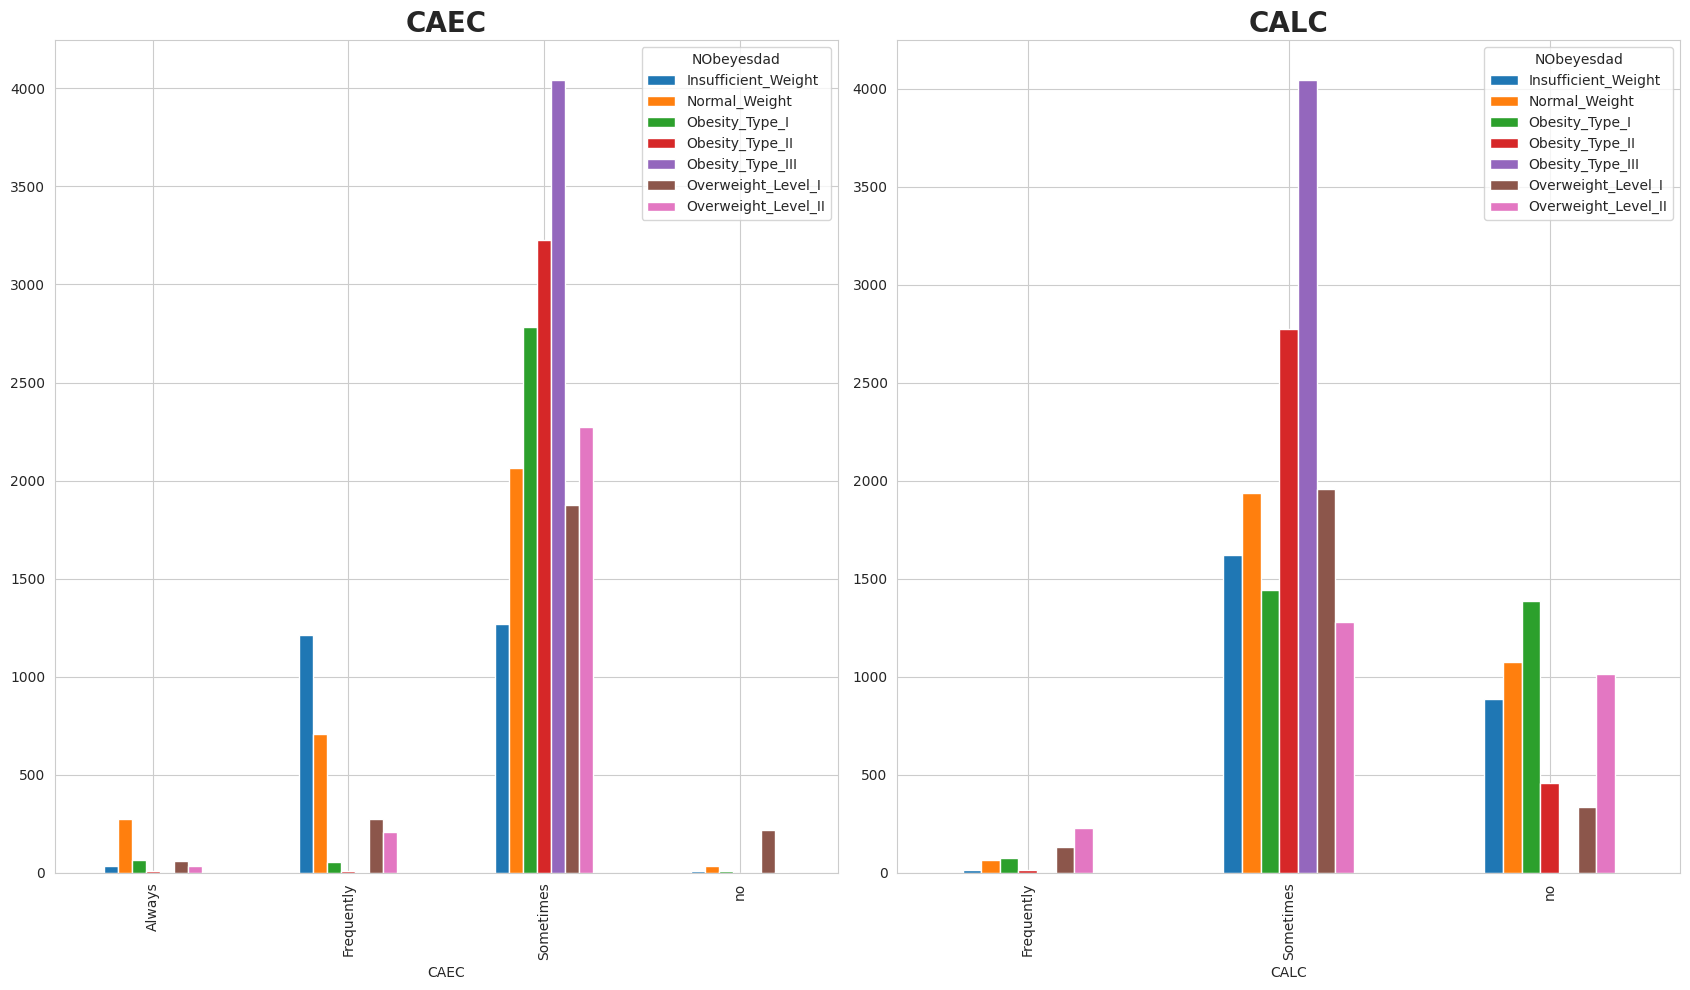

In [16]:
fig , ax = plt.subplots(1,2,figsize=(17,10))
pd.crosstab(train_data['CAEC'],train_data['NObeyesdad']).plot(kind='bar',ax=ax[0])
ax[0].set_title('CAEC',fontweight='bold',fontsize=20)

pd.crosstab(train_data['CALC'],train_data['NObeyesdad']).plot(kind='bar',ax=ax[1])
ax[1].set_title('CALC',fontweight='bold',fontsize=20)

plt.tight_layout()
plt.show()

**Numerical Columns**

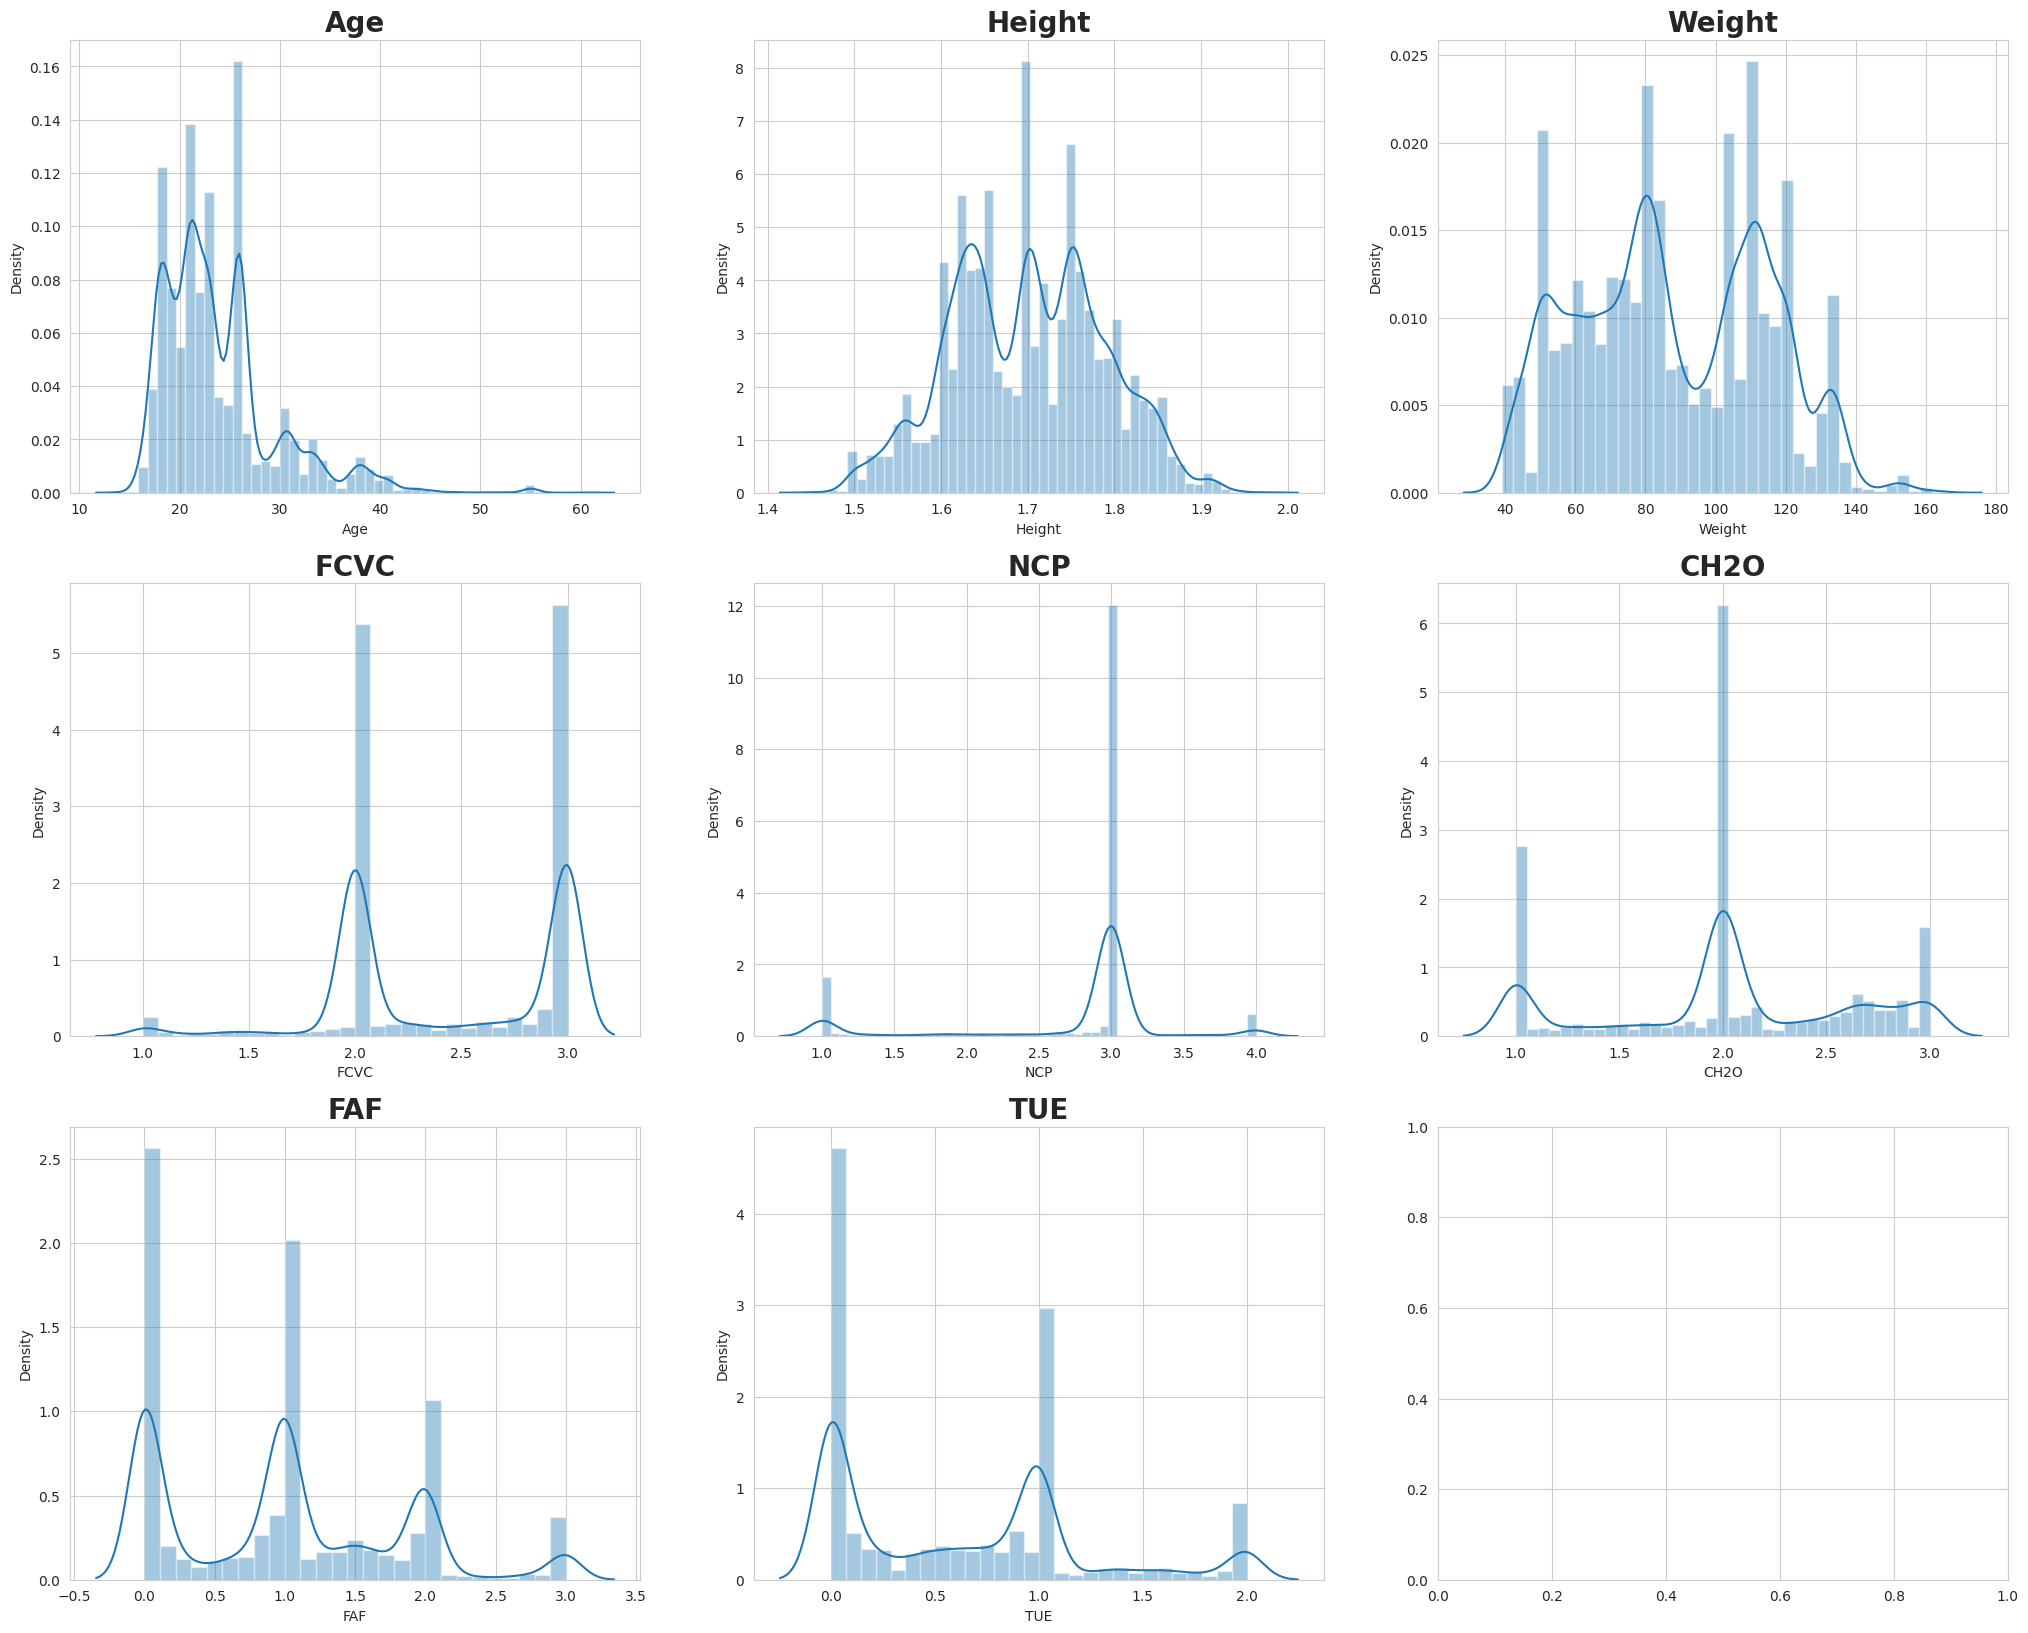

In [17]:
num_col = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']

x=1
plt.subplots(3,3,figsize=(25,20))
for col in num_col:
  plt.subplot(3,3,x)
  sns.distplot(train_data[col])
  plt.title(col,fontweight='bold',fontsize=20)

  x += 1
plt.show()

**Encoding Target Column**

In [18]:
from sklearn.preprocessing import OrdinalEncoder

ordinalencoder = OrdinalEncoder()
y = ordinalencoder.fit_transform(train_data['NObeyesdad'].values.reshape(-1,1))

y

array([[6.],
       [1.],
       [0.],
       ...,
       [3.],
       [6.],
       [3.]])

**Checking accuracy score**

In [19]:
X = train_data[num_col]
y = y


baseline = RandomForestClassifier(criterion="gini", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="accuracy"
)


print(baseline_score.mean())

0.8804317412662362


**Feature Creation**

In [20]:
#Body Mass Index

train_data['BMI'] = train_data['Weight']/train_data['Height']

#For test data

test['BMI'] = test['Weight']/test['Height']

In [21]:
#Physical Activity Level (PAL)

train_data['PAL'] = (train_data['FAF'] * train_data['TUE'])/24

test['PAL'] = (test['FAF'] * test['TUE'])/24

#Daily Water Intake per Unit Body Weight

train_data['DWI_UBW'] = train_data['CH2O'] / train_data['Weight']

test['DWI_UBW'] = test['CH2O'] / test['Weight']

In [22]:
num_cols = ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE', 
            'BMI','DWI_UBW', 'PAL']

X = train_data[num_cols]
y = y


baseline = RandomForestClassifier(criterion="gini", random_state=0)
baseline_score = cross_val_score(
    baseline, X, y, cv=5, scoring="accuracy"
)


print(baseline_score.mean())

0.8849599581130253


**After using new features, still getting a good accuracy score.It is good to go for model building.**

In [23]:
X = train_data.drop('NObeyesdad',axis=1)
y = train_data['NObeyesdad']

x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

num_col = [col for col in x_train.columns if x_train[col].dtype !='object']

cat_col = [col for col in x_train.columns if x_train[col].dtype =='object']

**Pipeline using DecisionTreeClassifier**

In [24]:
model_dt = DecisionTreeClassifier()
numerical_transformer = SimpleImputer(strategy='constant')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder( handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ])

my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_dt)
                             ])


my_pipeline.fit(x_train, y_train)
preds = my_pipeline.predict(x_test)
print(f'Accuracy Score using {model_dt} is : ' ,     [accuracy_score(y_test,preds)])

Accuracy Score using DecisionTreeClassifier() is :  [0.844412331406551]


**Pipeline using RandomForestClassifier**

In [25]:
model_rf = RandomForestClassifier()
numerical_transformer = SimpleImputer(strategy='constant')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder( handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ])

my_pipeline1 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_rf)
                             ])


my_pipeline1.fit(x_train, y_train)
preds = my_pipeline1.predict(x_test)
print(f'Accuracy Score using {model_rf} is : ' ,     [accuracy_score(y_test,preds)])

Accuracy Score using RandomForestClassifier() is :  [0.8937861271676301]


**Pipeline using GradientBoostingClassifier**

In [26]:
model_gb = GradientBoostingClassifier()
numerical_transformer = SimpleImputer(strategy='constant')


categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot',OneHotEncoder( handle_unknown='ignore'))
])


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, num_col),
        ('cat', categorical_transformer, cat_col)
    ])

my_pipeline2 = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model_gb)
                             ])


my_pipeline2.fit(x_train, y_train)
preds = my_pipeline2.predict(x_test)
print(f'Accuracy Score using {model_gb} is : ' ,     [accuracy_score(y_test,preds)])

Accuracy Score using GradientBoostingClassifier() is :  [0.8973988439306358]


In [27]:
my_pipeline2.fit(x_train, y_train)

predictions = my_pipeline2.predict(test)

output = pd.DataFrame({'id': test.id, 'NObeyesdad': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [28]:
pd.read_csv('submission.csv')

,id,NObeyesdad
0,20758,Obesity_Type_II
1,20759,Overweight_Level_I
2,20760,Obesity_Type_III
3,20761,Obesity_Type_I
4,20762,Obesity_Type_III
...,...,...
13835,34593,Overweight_Level_II
13836,34594,Normal_Weight
13837,34595,Insufficient_Weight
13838,34596,Normal_Weight
